In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
import statsmodels.formula.api as smf
from pandas import read_csv
import pandas as pd
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

%matplotlib inline

train = pd.read_csv('dataset/sales_train.csv')
test = pd.read_csv('dataset/test.csv')
shops = pd.read_csv('dataset/shops.csv')
items = pd.read_csv('dataset/items.csv')
items_categories = pd.read_csv('dataset/item_categories.csv')

def preprocess_date(data):
    data['month'], data['date'], data['year'] = data['date'].str.split('.').str
    data[['month']] = data[['month']].astype(int)
    data[['date']] = data[['date']].astype(int)
    data[['year']] = data[['year']].astype(int)
    return data
    
print(preprocess_date(train).head())


gp = train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': ['sum']})
X = np.array(list(map(list, gp.index.values)))
Y_train = gp.values
test['date_block_num'] = train['date_block_num'].max() + 1
X_test = test[['date_block_num', 'shop_id', 'item_id']].values

oh0 = OneHotEncoder().fit(X[:,0].reshape(-1, 1))
x0 = oh0.transform(X[:,0].reshape(-1, 1))
oh1 = OneHotEncoder().fit(X[:,1].reshape(-1, 1))
x1 = oh1.transform(X[:,1].reshape(-1, 1))
x1_t = oh1.transform(X_test[:,1].reshape(-1, 1))
X_train = np.concatenate((X[:, :1], x1.toarray(), X[:, 2:]), axis=1)
X_test = np.concatenate((X_test[:, :1], x1_t.toarray(), X_test[:, 2:]), axis=1)



   date  date_block_num  shop_id  item_id  item_price  item_cnt_day  month  \
0     1               0       59    22154      999.00           1.0      2   
1     1               0       25     2552      899.00           1.0      3   
2     1               0       25     2552      899.00          -1.0      5   
3     1               0       25     2554     1709.05           1.0      6   
4     1               0       25     2555     1099.00           1.0     15   

   year  
0  2013  
1  2013  
2  2013  
3  2013  
4  2013  


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3981      0.152      2.622      0.009       0.101       0.696
ma.L1         -0.8660      0.086    -10.116      0.000      -1.034      -0.698
ar.S.L12      -0.2030      0.174     -1.164      0.244      -0.545       0.139
ma.S.L12      -0.7648      0.142     -5.385      0.000      -1.043      -0.486
sigma2      5.811e+06   1.29e+06      4.506      0.000    3.28e+06    8.34e+06


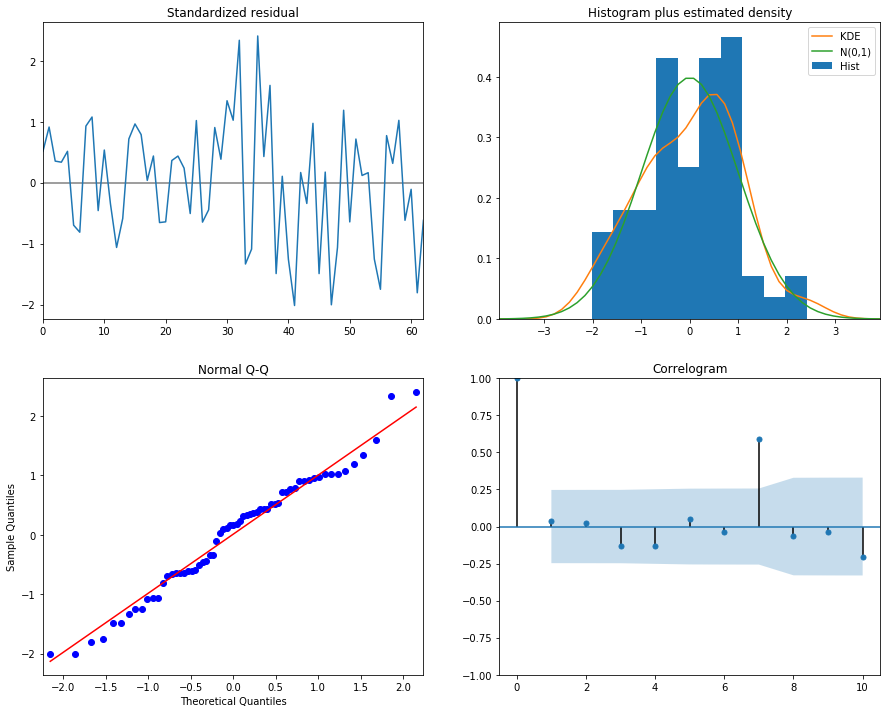

(80, 2)


In [27]:
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


def arima_predict(data):
    '''
    data = pd.DataFrame(data)
    acf = plot_acf(data,lags=20)
    pacf = plot_pacf(data,lags=20)
    for i in range(3):
        data_diff = data.diff(1)
        diff = data.dropna()
    plt.figure()
    plt.plot(diff)
    '''
    mod = sm.tsa.statespace.SARIMAX(data,
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    results = mod.fit()
    print(results.summary().tables[1])
    results.plot_diagnostics(figsize=(15, 12))
    plt.show()
    
    pred = results.get_prediction(10, dynamic=False)
    pred_ci = pred.conf_int()
    print(pred_ci.shape)
    return 

dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422,
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355,
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767,
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232,
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248,
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722,
11999,9390,13481,14795,15845,15271,14686,11054,10395]

arima_predict(dta)